In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

In [ ]:
data = keras.datasets.fashion_mnist

(x_train,y_train),(x_test,y_test) = data.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_names

In [ ]:
plt.imshow(x_train[7],cmap=mpl.cm.binary,interpolation='nearest')
plt.show()

In [ ]:
x_train,x_test = x_train/255.0,x_test/255.0
x_train

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=15)

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
y_pred = model.predict(x_test)
y_pred

In [ ]:
yt = [class_names[np.argmax(x)] for x in y_pred]
yt

In [ ]:
class_names

In [ ]:
(yt==y_test)

In [ ]:
data = keras.datasets.imdb
data.load_data(num_words=10000)

In [ ]:
(x_train,y_train),(x_test,y_test) = data.load_data(num_words=10000)

In [ ]:
len(x_train[0])

In [ ]:
word_index = data.get_word_index()
word_index

In [ ]:
word_index['fawn']

In [ ]:
word_index = {k:(v+3) for k,v in word_index.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2
word_index['<UNUSED'] = 3

reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
reverse_word_index

In [ ]:
x_test[0]

In [ ]:
h = ' '.join(reverse_word_index.get(i,'?') for i in x_test[0])
h

In [ ]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train,value=word_index['<PAD>'],padding='post',maxlen=256)
x_test = keras.preprocessing.sequence.pad_sequences(x_test,value=word_index['<PAD>'],padding='post',maxlen=256)

In [ ]:
len(x_test[1])

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(10000,16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.summary()

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
y_val = y_train[:10000]

x_train = x_train[10000:]
y_train = y_train[10000:]

In [ ]:
fitModel = model.fit(x_train,y_train, epochs=40,batch_size=512,validation_data=(x_val,y_val),verbose=1)
result = model.evaluate(x_test,y_test)

In [ ]:
result

In [ ]:
y_val[0].shape

In [ ]:
h


In [ ]:
model.predict(x_test)

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
x_test[0].shape

In [ ]:
model.predict(x_test[0][tf.newaxis,...])

In [ ]:
with open('review.txt') as f:
    vector = [1]
    for line in f.readlines():
        nline = line.replace(',',"").replace('.',"").replace(")",'').replace(':','').replace("\"",'').strip()
        for word in line.split():
            if word in word_index:
                vector.append(word_index[word.lower()])
            else:
                vector.append(2)
        encode = keras.preprocessing.sequence.pad_sequences([vector],value=word_index['<PAD>'],padding='post',maxlen=256)
        print(vector)
        # predict = model.predict(encode)
        # print(line)
        # print(encode)
        # print(predict[0])


vector

In [ ]:
encode = keras.preprocessing.sequence.pad_sequences(vector,value=word_index['<PAD>'],padding='post',maxlen=256)
encode

In [ ]:
vector = np.array(vector)
vector

In [ ]:
vector

In [ ]:
for i in range(256-len(vector)):
    vector.append(0)

In [ ]:

len(vector)

In [ ]:
vector = np.array(vector)
vector


In [ ]:
vector = vector[tf.newaxis,...]
model.predict(vector)


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [ ]:
data_file_path = r'train_0000.npy'
model_save_file_path = 'low_level_model'

nn_layers = [64,64,9]
learning_rate = 0.0001
epochs = 5

train_data = np.load(data_file_path)
train_data.shape


In [ ]:
import tensorflow as tf
c_

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf
from tensorflow import keras

In [34]:
from tensorflow.estimator import LinearRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
tf.__version__

'2.11.0'

In [35]:
boston_load = datasets.load_boston()
boston_load

c:\Users\bkj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [36]:
feature_columns = boston_load.feature_names
target_column = boston_load.target
len(target_column)

506

In [38]:
import pandas as pd
boston_data = pd.DataFrame(boston_load.data,columns=feature_columns).astype(np.float32)
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.099998,2.4786,1.0,273.0,21.000000,391.989990,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.699997,2.2875,1.0,273.0,21.000000,396.899994,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1.0,273.0,21.000000,396.899994,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300003,2.3889,1.0,273.0,21.000000,393.450012,6.48


In [39]:
boston_data['MEDV'] = target_column.astype(np.float32)
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.099998,2.4786,1.0,273.0,21.000000,391.989990,9.67,22.400000
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.699997,2.2875,1.0,273.0,21.000000,396.899994,9.08,20.600000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1.0,273.0,21.000000,396.899994,5.64,23.900000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300003,2.3889,1.0,273.0,21.000000,393.450012,6.48,22.000000


In [ ]:
sb.pairplot(boston_data,diag_kind='kde')

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(boston_data,figsize=(12,8))

In [ ]:
correlation_data = boston_data.corr()
correlation_data.style.background_gradient(cmap='coolwarm',axis=None)

In [ ]:
boston_data.describe().transpose()

In [ ]:
boston_data.info()

In [ ]:
boston_data.columns

In [45]:
x_data = boston_data[[i for i in boston_data.columns if i != 'MEDV']]
y_data = boston_data[['MEDV']]

In [46]:
x_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.099998,2.4786,1.0,273.0,21.000000,391.989990,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.699997,2.2875,1.0,273.0,21.000000,396.899994,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1.0,273.0,21.000000,396.899994,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300003,2.3889,1.0,273.0,21.000000,393.450012,6.48


In [47]:
y_data

,MEDV
0,24.000000
1,21.600000
2,34.700001
3,33.400002
4,36.200001
...,...
501,22.400000
502,20.600000
503,23.900000
504,22.000000


In [48]:
training_features,test_features,training_labels,test_labels = train_test_split(x_data,y_data,test_size=0.2)

In [49]:
training_features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
433,5.58107,0.0,18.10,0.0,0.713,6.436,87.900002,2.3158,24.0,666.0,20.200001,100.190002,16.219999
495,0.17899,0.0,9.69,0.0,0.585,5.670,28.799999,2.7986,6.0,391.0,19.200001,393.290009,17.600000
369,5.66998,0.0,18.10,1.0,0.631,6.683,96.800003,1.3567,24.0,666.0,20.200001,375.329987,3.730000
297,0.14103,0.0,13.92,0.0,0.437,5.790,58.000000,6.3200,4.0,289.0,16.000000,396.899994,15.840000
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.000000,1.8226,4.0,711.0,20.100000,318.429993,29.680000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.09512,0.0,12.83,0.0,0.437,6.286,45.000000,4.5026,5.0,398.0,18.700001,383.230011,8.940000
440,22.05110,0.0,18.10,0.0,0.740,5.818,92.400002,1.8662,24.0,666.0,20.200001,391.450012,22.110001
191,0.06911,45.0,3.44,0.0,0.437,6.739,30.799999,6.4798,5.0,398.0,15.200000,389.709991,4.690000
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.099998,1.4261,24.0,666.0,20.200001,396.899994,30.809999


In [ ]:
test_features

In [ ]:
training_labels

In [ ]:
stats = boston_data.describe()
stats.transpose()

In [ ]:
training_features

In [ ]:
training_features.mean(axis=0)

In [ ]:
stats.transpose()

In [ ]:
stats = stats.transpose()
stats

In [ ]:
training_features

In [40]:
def norm(x):
    stats = x.describe()
    stats = stats.transpose()
    return (x-stats['mean'])/stats['std']

In [50]:
normed_train_features = norm(training_features)
normed_test_features = norm(test_features)
normed_train_features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
433,0.238242,-0.490897,0.982418,-0.282870,1.376579,0.199320,0.678798,-0.698071,1.632182,1.498220,0.803417,-2.741922,0.458580
495,-0.410032,-0.490897,-0.225877,-0.282870,0.263837,-0.856093,-1.453538,-0.474021,-0.416002,-0.109719,0.345488,0.403363,0.650136
369,0.248911,-0.490897,0.982418,3.526444,0.663729,0.539643,0.999911,-1.143154,1.632182,1.498220,0.803417,0.210632,-1.275138
297,-0.414587,-0.490897,0.381862,-0.282870,-1.022770,-0.690754,-0.399998,1.160130,-0.643578,-0.706118,-1.119885,0.442102,0.405833
490,-0.406615,-0.490897,2.367432,-0.282870,0.472477,-1.651098,1.043207,-0.926947,-0.643578,1.761337,0.757624,-0.399967,2.326942
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,-0.420096,-0.490897,0.225258,-0.282870,-1.022770,-0.007354,-0.869040,0.316742,-0.529790,-0.068790,0.116523,0.295408,-0.551946
440,2.214718,-0.490897,0.982418,-0.282870,1.611298,-0.652175,0.841158,-0.906714,1.632182,1.498220,0.803417,0.383618,1.276162
191,-0.423218,1.393501,-1.123837,-0.282870,-1.022770,0.616801,-1.381378,1.234287,-0.529790,-0.068790,-1.486228,0.364945,-1.141881
385,1.585979,-0.490897,0.982418,-0.282870,1.263566,-1.397578,1.046815,-1.110948,1.632182,1.498220,0.803417,0.442102,2.483795


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(training_features)
x

In [ ]:
y = StandardScaler().fit_transform(training_features)
y

In [ ]:
normed_train_features

In [51]:
def feed_input(features_dataframes,target_dataframe,num_of_epochs=10,shuffle=True,batch_size=32):
    def input_feed_function():
        dataset = tf.data.Dataset.from_tensor_slices((dict(features_dataframe),target_dataframe))
        if shuffle:
            dataset = dataset.shuffle(2000)
        dataset = dataset.batch(batch_size).repeat(num_of_epochs)
        return dataset
    return input_feed_function
train_feed_input = feed_input(normed_train_features,training_labels)
train_feed_input

<function __main__.feed_input.<locals>.input_feed_function()>

In [ ]:
y = tf.data.Dataset.from_tensor_slices([1,2,2,3,1,1,2,43,2,4,4,2,12,123,42,36])
y = y.shuffle(200)
y = y.batch(4).repeat(10)
for i in y:
    print(i)
len(y)

In [ ]:
tensor1
dataset = tf.data.Dataset.from_tensor_slices(tensor1)
dataset


In [ ]:
for i in dataset:
    print(i)

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((dict(normed_train_features),training_labels))
x = dataset.shuffle(2000)
dataset = x.batch(batch_size=32).repeat(10)
dataset

In [ ]:
len(dataset)

In [ ]:
def feed_input(features_dataframes,target_dataframe,num_of_epochs=10,shuffle=True,batch_size=32):
    def input_feed_function():
        dataset = tf.data.Dataset.from_tensor_slices((dict(features_dataframes),target_dataframe))
        if shuffle:
            dataset = dataset.shuffle(2000)
        dataset = dataset.batch(batch_size).repeat(num_of_epochs)
        return dataset
    return input_feed_function
train_feed_input = feed_input(normed_train_features,training_labels)
train_feed_input

In [ ]:
train_feed_input_testing = feed_input(normed_train_features,training_labels,num_of_epochs=1,shuffle=False)
train_feed_input_testing

In [ ]:
test_feed_input = feed_input(normed_test_features,test_labels,num_of_epochs=1,shuffle=False)

In [ ]:
len(train_feed_input)

In [ ]:
feature_columns_numeric = [tf.feature_column.numeric_column(m) for m in training_features.columns]
feature_columns_numeric

In [ ]:
feature_columns

In [ ]:
linear_model = LinearRegressor(feature_columns=feature_columns_numeric,optimizer='RMSProp')
linear_model.train(train_feed_input)

In [154]:
train_predictions = linear_model.predict(train_feed_input_testing)
test_predictions = linear_model.predict(test_feed_input)

In [155]:
train_predictions_series = pd.Series([p['predictions'][0] for p in train_predictions])
train_predictions_series

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\bkj\AppData\Local\Temp\tmp1gezhenp\model.ckpt-130
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0      23.419920
1      24.704281
2      21.999905
3      19.205557
4      31.385235
         ...    
399    31.614929
400    32.237862
401    21.353340
402     0.484831
403    14.064633
Length: 404, dtype: float32

In [153]:
test_predictions_series

In [151]:
for p in train_predictions:
    print(p['predictions'][0])

In [156]:
boston_load = datasets.load_boston()
boston_load



c:\Users\bkj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [157]:
boston_data = boston_load.data
boston_data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [158]:
boston_data = pd.DataFrame(boston_data,columns=boston_load.feature_names)
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [159]:
boston_data['MEDV'] = boston_load.target
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [161]:
correlation = boston_data.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [162]:
correlation.transpose()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [163]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot:xlabel='CRIM', ylabel='CRIM'>,
        <AxesSubplot:xlabel='ZN', ylabel='CRIM'>,
        <AxesSubplot:xlabel='INDUS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='CHAS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='NOX', ylabel='CRIM'>,
        <AxesSubplot:xlabel='RM', ylabel='CRIM'>,
        <AxesSubplot:xlabel='AGE', ylabel='CRIM'>,
        <AxesSubplot:xlabel='DIS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='RAD', ylabel='CRIM'>,
        <AxesSubplot:xlabel='TAX', ylabel='CRIM'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='CRIM'>,
        <AxesSubplot:xlabel='B', ylabel='CRIM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='CRIM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='CRIM'>],
       [<AxesSubplot:xlabel='CRIM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='INDUS', ylabel='ZN'>,
        <AxesSubplot:xlabel='CHAS', ylabel='ZN'>,
        <AxesSubplot:xlabel='NOX', ylabel='ZN'>,
        <AxesSubplot:xlabel='R

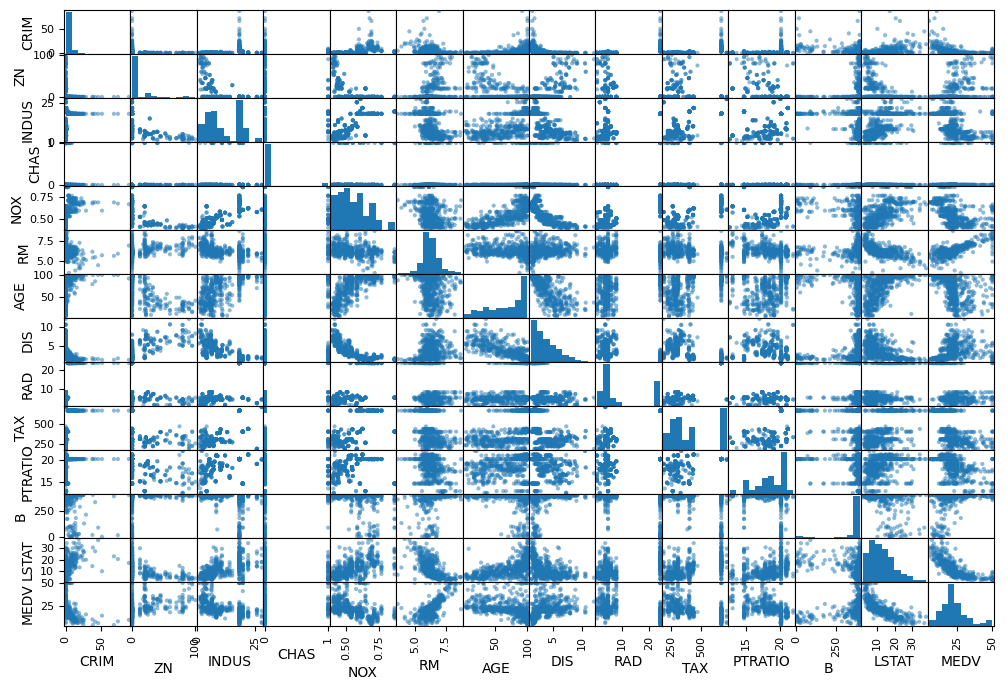

In [164]:
from pandas.plotting import scatter_matrix

scatter_matrix(boston_data,figsize=(12,8))

In [165]:
stats = boston_data.describe()
boston_stats = stats.transpose()
boston_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [166]:
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [167]:
x_data = boston_data[[x for x in boston_data.columns if x != 'MEDV']]
x_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [168]:
y_data = boston_data[['MEDV']]
y_data

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [169]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_label,test_label = train_test_split(x_data,y_data,test_size=0.2)
train_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
349,0.02899,40.0,1.25,0.0,0.4290,6.939,34.5,8.7921,1.0,335.0,19.7,389.85,5.89
129,0.88125,0.0,21.89,0.0,0.6240,5.637,94.7,1.9799,4.0,437.0,21.2,396.90,18.34
279,0.21038,20.0,3.33,0.0,0.4429,6.812,32.2,4.1007,5.0,216.0,14.9,396.90,4.85
169,2.44953,0.0,19.58,0.0,0.6050,6.402,95.2,2.2625,5.0,403.0,14.7,330.04,11.32
210,0.17446,0.0,10.59,1.0,0.4890,5.960,92.1,3.8771,4.0,277.0,18.6,393.25,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,0.80271,0.0,8.14,0.0,0.5380,5.456,36.6,3.7965,4.0,307.0,21.0,288.99,11.69
431,10.06230,0.0,18.10,0.0,0.5840,6.833,94.3,2.0882,24.0,666.0,20.2,81.33,19.69
145,2.37934,0.0,19.58,0.0,0.8710,6.130,100.0,1.4191,5.0,403.0,14.7,172.91,27.80
103,0.21161,0.0,8.56,0.0,0.5200,6.137,87.4,2.7147,5.0,384.0,20.9,394.47,13.44


In [170]:
train_label

,MEDV
349,26.6
129,14.3
279,35.1
169,22.3
210,21.7
...,...
18,20.2
431,14.1
145,13.8
103,19.3


In [171]:
test_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
54,0.01360,75.0,4.00,0.0,0.410,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
328,0.06617,0.0,3.24,0.0,0.460,5.868,25.8,5.2146,4.0,430.0,16.9,382.44,9.97
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
372,8.26725,0.0,18.10,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.12932,0.0,13.92,0.0,0.437,6.678,31.1,5.9604,4.0,289.0,16.0,396.90,6.27
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10
262,0.52014,20.0,3.97,0.0,0.647,8.398,91.5,2.2885,5.0,264.0,13.0,386.86,5.91


In [172]:
test_label

,MEDV
54,18.9
371,50.0
328,19.3
365,27.5
372,50.0
...,...
295,28.6
385,7.2
497,18.3
262,48.8


In [186]:
def norm(x):
    stat = x.describe()
    stats = stat.tranpose()
    return (x - stats['mean'])/stats['std']

normed_train_data = norm(train_data)
normed_test_data = norm(test_data)


AttributeError: 'DataFrame' object has no attribute 'tranpose'

In [192]:
def norm(x):    
    stat = x.describe()
    stats = stat.transpose()
    return (x-stats['mean'])/stats['std']

In [195]:
normed_train_data = norm(train_data)
normed_test_data = norm(test_data)
normed_train_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
349,-0.418990,1.321364,-1.466461,-0.267284,-1.112800,0.956069,-1.249801,2.553587,-0.992274,-0.442296,0.532288,0.369536,-0.977770
129,-0.327696,-0.465219,1.534208,-0.267284,0.572100,-0.909376,0.898520,-0.857022,-0.652354,0.151176,1.233214,0.443408,0.731247
279,-0.399559,0.428072,-1.164068,-0.267284,-0.992697,0.774109,-1.331880,0.204782,-0.539048,-1.134681,-1.710677,0.443408,-1.120531
169,-0.159701,-0.465219,1.198377,-0.267284,0.407931,0.186680,0.916363,-0.715535,-0.539048,-0.046648,-1.804134,-0.257171,-0.232391
210,-0.403407,-0.465219,-0.108601,3.732077,-0.594369,-0.446597,0.805735,0.092834,-0.652354,-0.779761,0.018275,0.405162,0.584368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,-0.336109,-0.465219,-0.464785,-0.267284,-0.170984,-1.168705,-1.174860,0.052480,-0.652354,-0.605210,1.139757,-0.687304,-0.181601
431,0.655780,-0.465219,0.983213,-0.267284,0.226480,0.804197,0.884245,-0.802801,1.613778,1.483580,0.765930,-2.863225,0.916562
145,-0.167220,-0.465219,1.198377,-0.267284,2.706307,-0.203029,1.087658,-1.137793,-0.539048,-0.046648,-1.804134,-1.903623,2.029825
103,-0.399428,-0.465219,-0.403724,-0.267284,-0.326513,-0.193000,0.638009,-0.489136,-0.539048,-0.157196,1.093029,0.417945,0.058622


In [196]:
normed_test_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
54,-0.514403,2.260543,-0.937966,-0.290296,-1.139730,-0.620280,-0.604883,1.267595,-0.697252,0.463245,1.377386,0.441067,0.560300
371,1.542675,-0.570687,1.146821,-0.290296,0.762084,-0.165987,1.235277,-1.235081,1.860135,1.734716,0.972506,0.016494,-0.266265
328,-0.502672,-0.570687,-1.050337,-0.290296,-0.709455,-0.647981,-1.370445,0.411031,-0.575472,0.211532,-0.512054,0.241414,-0.197254
365,0.499168,-0.570687,1.146821,-0.290296,1.510761,-3.843267,0.810355,-1.054377,1.860135,1.734716,0.972506,-0.141599,-0.644257
372,1.327332,-0.570687,1.146821,3.410983,1.080487,-0.638286,0.870055,-1.251153,1.860135,1.734716,0.972506,-0.235764,-0.368213
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.488581,-0.570687,0.528778,-0.290296,-0.907381,0.473901,-1.184322,0.714496,-0.575472,-0.698506,-0.916934,0.441067,-0.777574
385,3.233979,-0.570687,1.146821,-0.290296,1.355862,-1.466540,1.168554,-1.130508,1.860135,1.734716,0.972506,0.441067,3.071361
497,-0.457551,-0.570687,-0.096658,-0.290296,0.366231,-0.750474,0.202821,-0.533749,-0.331911,-0.040180,0.522639,0.441067,0.450509
262,-0.401373,0.184308,-0.942401,-0.290296,0.899771,2.856169,0.936778,-0.779598,-0.453691,-0.859860,-2.266535,0.302443,-0.834037


In [387]:
def tensor_pipeline(data,label,epochs=10,batch_size=32,shuffle=True):
    def tensor_pipelines():
        dataset = tf.data.Dataset.from_tensor_slices((dict(data),label))
        if shuffle:
            dataset = dataset.shuffle(2000)
        dataset = dataset.batch(batch_size).repeat(epochs)
        return dataset
    return tensor_pipelines

trained_pipeline = tensor_pipeline(normed_train_data,train_label)
trained_pipeline_test = tensor_pipeline(normed_train_data,train_label,epochs=1,shuffle=False)
test_pipeline = tensor_pipeline(normed_test_data,test_label,epochs=1,shuffle=False)
trained_pipeline

<function __main__.tensor_pipeline.<locals>.tensor_pipelines()>

In [389]:
type(trained_pipeline)

function

In [212]:
feature_columns_num = [tf.feature_column.numeric_column(m) for m in normed_train_data.columns]
feature_columns_num

[NumericColumn(key='CRIM', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='ZN', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='INDUS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='CHAS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='NOX', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='RM', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='AGE', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='DIS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='RAD', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='TAX', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='PTRATIO'

In [269]:
lin_reg = LinearRegressor(feature_columns=feature_columns_num,optimizer='RMSProp')
lin_reg

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\bkj\\AppData\\Local\\Temp\\tmpg39xcf22', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [270]:
lin_reg.train(trained_pipeline)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\bkj\AppData\Local\Temp\tmpg39xcf22\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 663.15784, step = 0
INFO:tensorflow:global_step/sec: 450.784
INFO:tensorflow:loss = 23.733782, step = 100 (0.224 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 130...
INFO:tensorflow:Saving checkpoints for 130 into C:\Users\bkj\AppData\Local\Temp\tmpg39xcf22\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 130...
INFO:tensorflow:Loss for final step: 23.074593.


In [296]:
test_predictions = lin_reg.predict(test_pipeline)
test_prediction_array = [p['predictions'][0] for p in test_predictions]
test_prediction_array

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\bkj\AppData\Local\Temp\tmpg39xcf22\model.ckpt-130
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[15.745418,
 19.467718,
 21.942204,
 9.662445,
 19.389292,
 21.957623,
 26.083757,
 26.70233,
 23.522049,
 7.595278,
 18.744036,
 11.129242,
 24.681938,
 32.04026,
 29.703386,
 19.08714,
 31.8843,
 18.815273,
 13.632323,
 34.093376,
 31.13908,
 28.083385,
 12.231512,
 9.845515,
 23.0613,
 -1.7259159,
 26.857632,
 24.159832,
 30.901844,
 19.44204,
 17.452595,
 14.08499,
 19.368034,
 29.335026,
 17.775019,
 20.371063,
 19.74371,
 14.341784,
 22.203783,
 27.886732,
 17.785336,
 14.480319,
 27.438608,
 36.56785,
 4.715185,
 18.88179,
 34.027214,
 12.61315,
 28.290745,
 27.289518,
 12.42321,
 25.894514,
 31.484756,
 18.357407,
 11.776667,
 31.347826,
 18.425875,
 22.858725,
 19.360035,
 14.116951,
 33.16387,
 21.98091,
 11.704679,
 24.531359,
 30.340883,
 41.180397,
 24.9388,
 24.26703,
 29.130081,
 26.30006,
 23.632694,
 35.311245,
 23.431787,
 20.59318,
 20.393503,
 23.684599,
 26.899158,
 5.8602657,
 5.7426434,
 22.024662,
 13.449119,
 33.593533,
 10.193983,
 34.46721,
 10.677951,
 9.365

In [297]:
test_predictions_df = pd.DataFrame(test_prediction_array,columns=['prediction'])
test_predictions_df

,prediction
0,15.745418
1,19.467718
2,21.942204
3,9.662445
4,19.389292
...,...
97,27.880939
98,1.378624
99,17.586437
100,39.375061


In [298]:
test_label

,MEDV
54,18.9
371,50.0
328,19.3
365,27.5
372,50.0
...,...
295,28.6
385,7.2
497,18.3
262,48.8


In [268]:
train_label

,MEDV
349,26.6
129,14.3
279,35.1
169,22.3
210,21.7
...,...
18,20.2
431,14.1
145,13.8
103,19.3


In [290]:
train_prediction = lin_reg.predict(trained_pipeline_test)
train_prediction = pd.DataFrame([p['predictions'][0] for p in train_prediction],columns=['prediction'])
train_prediction

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\bkj\AppData\Local\Temp\tmpg39xcf22\model.ckpt-130
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


,prediction
0,23.635702
1,13.279030
2,35.750111
3,25.821978
4,20.879543
...,...
399,16.210955
400,16.160202
401,11.563171
402,20.384090


In [292]:
train_label.reset_index(drop=True,inplace=True)

In [293]:
train_label

,MEDV
0,26.6
1,14.3
2,35.1
3,22.3
4,21.7
...,...
399,20.2
400,14.1
401,13.8
402,19.3


In [295]:
train_labels_with_predictions_df = pd.concat([train_label,train_prediction],axis=1)
train_labels_with_predictions_df

,MEDV,prediction
0,26.6,23.635702
1,14.3,13.279030
2,35.1,35.750111
3,22.3,25.821978
4,21.7,20.879543
...,...,...
399,20.2,16.210955
400,14.1,16.160202
401,13.8,11.563171
402,19.3,20.384090


In [306]:
test_labels_with_predictions_df = pd.concat([test_label,test_predictions_df],axis=1)
test_labels_with_predictions_df

,MEDV,prediction
0,18.9,15.745418
1,50.0,19.467718
2,19.3,21.942204
3,27.5,9.662445
4,50.0,19.389292
...,...,...
97,28.6,27.880939
98,7.2,1.378624
99,18.3,17.586437
100,48.8,39.375061


In [303]:
test_label.reset_index(drop=True,inplace=True)

In [302]:
test_predictions_df

,prediction
0,15.745418
1,19.467718
2,21.942204
3,9.662445
4,19.389292
...,...
97,27.880939
98,1.378624
99,17.586437
100,39.375061


In [304]:
test_label

,MEDV
0,18.9
1,50.0
2,19.3
3,27.5
4,50.0
...,...
97,28.6
98,7.2
99,18.3
100,48.8


In [310]:
def calculate_errors_and_r2(data):
    y_true,y_pred = data.iloc[:,0],data.iloc[:,1]
    mean_squared_err = (mean_squared_error(y_true,y_pred))
    root_mean_squared_err = np.sqrt(mean_squared_err)
    r2 = round(r2_score(y_true,y_pred) * 100,0)
    return mean_squared_err,root_mean_squared_err,r2

In [312]:
train_mean_squared_error, train_root_mean_squared_error,train_r2_score_percentage = calculate_errors_and_r2(train_labels_with_predictions_df)
test_mean_squared_error, test_root_mean_squared_error,test_r2_score_percentage = calculate_errors_and_r2(test_labels_with_predictions_df)
print('Training Data Mean Squared Error = ', train_mean_squared_error)
print('Training Data Root Mean Squared Error = ', train_root_mean_squared_error)
print('Training Data R2 = ', train_r2_score_percentage)
print('Test Data Mean Squared Error = ', test_mean_squared_error)
print('Test Data Root Mean Squared Error = ', test_root_mean_squared_error)
print('Test Data R2 = ', test_r2_score_percentage)

Training Data Mean Squared Error =  21.157100203697418
Training Data Root Mean Squared Error =  4.599684793950279
Training Data R2 =  74.0
Test Data Mean Squared Error =  41.8580264536234
Test Data Root Mean Squared Error =  6.469777929235547
Test Data R2 =  56.0


In [314]:
from tensorflow.estimator import LinearClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score
tf.__version__

'2.11.0'

In [316]:
col_names = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']
target_dimensions=['Setosa','Versicolor','Virginica']
training_data_path = tf.keras.utils.get_file('iris_training.csv',"https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_data_path = tf.keras.utils.get_file('iris_test.csv',"https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")
training = pd.read_csv(training_data_path,names=col_names,header=0)
training

573/573 [==============================] - 0s 0s/step


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0
...,...,...,...,...,...
115,5.5,2.6,4.4,1.2,1
116,5.7,3.0,4.2,1.2,1
117,4.4,2.9,1.4,0.2,0
118,4.8,3.0,1.4,0.1,0


In [317]:
test = pd.read_csv(test_data_path,names=col_names,header=0)
test

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.9,3.0,4.2,1.5,1
1,6.9,3.1,5.4,2.1,2
2,5.1,3.3,1.7,0.5,0
3,6.0,3.4,4.5,1.6,1
4,5.5,2.5,4.0,1.3,1
5,6.2,2.9,4.3,1.3,1
6,5.5,4.2,1.4,0.2,0
7,6.3,2.8,5.1,1.5,2
8,5.6,3.0,4.1,1.3,1
9,6.7,2.5,5.8,1.8,2


In [319]:
training = training[training['Species']>=1]
training['Species'] = training['Species'].replace([1,2],[0,1])
training

C:\Users\bkj\AppData\Local\Temp\ipykernel_12620\2683778053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['Species'] = training['Species'].replace([1,2],[0,1])


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,1
1,5.0,2.3,3.3,1.0,0
2,4.9,2.5,4.5,1.7,1
7,6.9,3.1,5.1,2.3,1
8,6.7,3.1,4.4,1.4,0
...,...,...,...,...,...
111,5.7,2.8,4.1,1.3,0
113,6.3,3.3,6.0,2.5,1
115,5.5,2.6,4.4,1.2,0
116,5.7,3.0,4.2,1.2,0


In [320]:
test = test[test['Species']>=1]
test['Species'] = test['Species'].replace([1,2],[0,1])
test

C:\Users\bkj\AppData\Local\Temp\ipykernel_12620\2576991571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Species'] = test['Species'].replace([1,2],[0,1])


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.9,3.0,4.2,1.5,0
1,6.9,3.1,5.4,2.1,1
3,6.0,3.4,4.5,1.6,0
4,5.5,2.5,4.0,1.3,0
5,6.2,2.9,4.3,1.3,0
7,6.3,2.8,5.1,1.5,1
8,5.6,3.0,4.1,1.3,0
9,6.7,2.5,5.8,1.8,1
10,7.1,3.0,5.9,2.1,1
12,5.6,2.8,4.9,2.0,1


In [323]:
training.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)
training

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,1
1,5.0,2.3,3.3,1.0,0
2,4.9,2.5,4.5,1.7,1
3,6.9,3.1,5.1,2.3,1
4,6.7,3.1,4.4,1.4,0
...,...,...,...,...,...
73,5.7,2.8,4.1,1.3,0
74,6.3,3.3,6.0,2.5,1
75,5.5,2.6,4.4,1.2,0
76,5.7,3.0,4.2,1.2,0


In [324]:
test

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.9,3.0,4.2,1.5,0
1,6.9,3.1,5.4,2.1,1
2,6.0,3.4,4.5,1.6,0
3,5.5,2.5,4.0,1.3,0
4,6.2,2.9,4.3,1.3,0
5,6.3,2.8,5.1,1.5,1
6,5.6,3.0,4.1,1.3,0
7,6.7,2.5,5.8,1.8,1
8,7.1,3.0,5.9,2.1,1
9,5.6,2.8,4.9,2.0,1


In [325]:
iris_dataset = pd.concat([training,test],axis=0)
iris_dataset

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,1
1,5.0,2.3,3.3,1.0,0
2,4.9,2.5,4.5,1.7,1
3,6.9,3.1,5.1,2.3,1
4,6.7,3.1,4.4,1.4,0
...,...,...,...,...,...
17,5.8,2.7,3.9,1.2,0
18,6.1,3.0,4.6,1.4,0
19,6.7,3.1,4.7,1.5,0
20,6.7,3.3,5.7,2.5,1


In [326]:
iris_dataset.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,6.262000,2.872000,4.906000,1.676000,0.500000
std,0.662834,0.332751,0.825578,0.424769,0.502519
min,4.900000,2.000000,3.000000,1.000000,0.000000
25%,5.800000,2.700000,4.375000,1.300000,0.000000
50%,6.300000,2.900000,4.900000,1.600000,0.500000
75%,6.700000,3.025000,5.525000,2.000000,1.000000
max,7.900000,3.800000,6.900000,2.500000,1.000000


array([[<AxesSubplot:xlabel='SepalLength', ylabel='SepalLength'>,
        <AxesSubplot:xlabel='SepalWidth', ylabel='SepalLength'>,
        <AxesSubplot:xlabel='PetalLength', ylabel='SepalLength'>,
        <AxesSubplot:xlabel='PetalWidth', ylabel='SepalLength'>,
        <AxesSubplot:xlabel='Species', ylabel='SepalLength'>],
       [<AxesSubplot:xlabel='SepalLength', ylabel='SepalWidth'>,
        <AxesSubplot:xlabel='SepalWidth', ylabel='SepalWidth'>,
        <AxesSubplot:xlabel='PetalLength', ylabel='SepalWidth'>,
        <AxesSubplot:xlabel='PetalWidth', ylabel='SepalWidth'>,
        <AxesSubplot:xlabel='Species', ylabel='SepalWidth'>],
       [<AxesSubplot:xlabel='SepalLength', ylabel='PetalLength'>,
        <AxesSubplot:xlabel='SepalWidth', ylabel='PetalLength'>,
        <AxesSubplot:xlabel='PetalLength', ylabel='PetalLength'>,
        <AxesSubplot:xlabel='PetalWidth', ylabel='PetalLength'>,
        <AxesSubplot:xlabel='Species', ylabel='PetalLength'>],
       [<AxesSubplot:xlabel='S

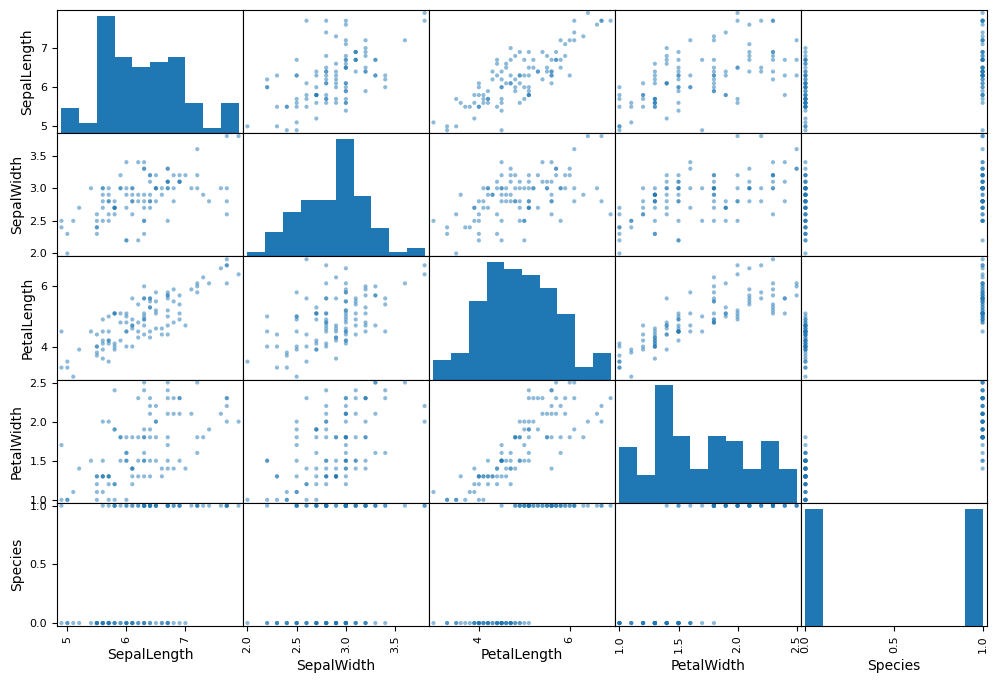

In [328]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris_dataset,figsize=(12,8))

In [329]:
stats = iris_dataset.describe()
iris_stats = stats.transpose()
iris_stats

,count,mean,std,min,25%,50%,75%,max
SepalLength,100.0,6.262,0.662834,4.9,5.800,6.3,6.700,7.9
SepalWidth,100.0,2.872,0.332751,2.0,2.700,2.9,3.025,3.8
PetalLength,100.0,4.906,0.825578,3.0,4.375,4.9,5.525,6.9
PetalWidth,100.0,1.676,0.424769,1.0,1.300,1.6,2.000,2.5
Species,100.0,0.500,0.502519,0.0,0.000,0.5,1.000,1.0


In [330]:
iris_dataset

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,1
1,5.0,2.3,3.3,1.0,0
2,4.9,2.5,4.5,1.7,1
3,6.9,3.1,5.1,2.3,1
4,6.7,3.1,4.4,1.4,0
...,...,...,...,...,...
17,5.8,2.7,3.9,1.2,0
18,6.1,3.0,4.6,1.4,0
19,6.7,3.1,4.7,1.5,0
20,6.7,3.3,5.7,2.5,1


In [331]:
x_data = iris_dataset[[x for x in iris_dataset.columns if x!= 'Species']]
x_data

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,6.9,3.1,5.1,2.3
4,6.7,3.1,4.4,1.4
...,...,...,...,...
17,5.8,2.7,3.9,1.2
18,6.1,3.0,4.6,1.4
19,6.7,3.1,4.7,1.5
20,6.7,3.3,5.7,2.5


In [332]:
y_data = iris_dataset[['Species']]
y_data

,Species
0,1
1,0
2,1
3,1
4,0
...,...
17,0
18,0
19,0
20,1


In [333]:
training_features,test_features,training_labels,test_labels = train_test_split(x_data,y_data,test_size=0.2)
training_features

,SepalLength,SepalWidth,PetalLength,PetalWidth
36,7.0,3.2,4.7,1.4
9,5.6,2.8,4.9,2.0
20,6.3,2.3,4.4,1.3
21,5.1,2.5,3.0,1.1
15,6.3,2.9,5.6,1.8
...,...,...,...,...
44,6.3,2.5,5.0,1.9
23,6.8,3.0,5.5,2.1
24,6.2,2.8,4.8,1.8
41,5.0,2.0,3.5,1.0


In [334]:
def norm(x):
    stats = x.describe()
    stats = stats.transpose()
    return (x-stats['mean'])/stats['std']

normed_train_features = norm(training_features)
normed_test_features = norm(test_features)

In [335]:
normed_test_features

,SepalLength,SepalWidth,PetalLength,PetalWidth
22,0.311648,1.152564,-0.715365,-0.520231
55,-0.467472,0.205251,-0.715365,-0.520231
13,-1.051813,-1.057833,0.106894,0.813695
45,0.311648,0.836793,0.929152,0.280125
47,2.064669,0.205251,2.244765,0.280125
6,1.285549,0.836793,-0.057558,-0.520231
52,-0.272692,0.521022,-0.057558,0.280125
11,-0.467472,-2.005146,-1.537623,-1.854158
73,-1.051813,-0.110520,-1.373171,-1.053802
0,0.311648,-0.110520,1.093603,1.347266


In [336]:
normed_train_features

,SepalLength,SepalWidth,PetalLength,PetalWidth
36,1.049613,0.943225,-0.227245,-0.618717
9,-0.956473,-0.240430,0.001429,0.749873
20,0.046570,-1.719999,-0.570257,-0.846815
21,-1.672932,-1.128171,-2.170978,-1.303012
15,0.046570,0.055484,0.801790,0.293677
...,...,...,...,...
44,0.046570,-1.128171,0.115766,0.521775
23,0.763029,0.351398,0.687453,0.977972
24,-0.096722,-0.240430,-0.112908,0.293677
41,-1.816224,-2.607740,-1.599292,-1.531110


In [344]:
def feed_input(data,label,epochs=10,batch_size=32,shuffle=True):
    def input_feed_function():
        dataset = tf.data.Dataset.from_tensor_slices((dict(data),label))
        if shuffle:
            dataset = dataset.shuffle(2000)
        dataset = dataset.batch(batch_size).repeat(epochs)
        return dataset
    return input_feed_function

train_feed_input = feed_input(normed_train_features,training_labels)
train_feed_input_test = feed_input(normed_train_features,training_labels,epochs=1,shuffle=False)
test_feed_input = feed_input(normed_test_features,test_labels,shuffle=False,epochs=1)

In [343]:
training_labels

,Species
36,0
9,1
20,0
21,0
15,1
...,...
44,1
23,1
24,1
41,0


In [345]:
logistic_model = LinearClassifier(feature_columns=feature_columns_num)
logistic_model.train(train_feed_input)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\bkj\\AppData\\Local\\Temp\\tmpzypcn49l', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflo

In [374]:
normed_train_features

,SepalLength,SepalWidth,PetalLength,PetalWidth
36,1.049613,0.943225,-0.227245,-0.618717
9,-0.956473,-0.240430,0.001429,0.749873
20,0.046570,-1.719999,-0.570257,-0.846815
21,-1.672932,-1.128171,-2.170978,-1.303012
15,0.046570,0.055484,0.801790,0.293677
...,...,...,...,...
44,0.046570,-1.128171,0.115766,0.521775
23,0.763029,0.351398,0.687453,0.977972
24,-0.096722,-0.240430,-0.112908,0.293677
41,-1.816224,-2.607740,-1.599292,-1.531110


In [379]:
train_predictions = logistic_model.predict(train_feed_input_testing)
test_predictions = logistic_model.predict(test_feed_input)
# train_predictions_series = pd.Series([p['classes'][0].decode("utf-8") for p in train_predictions])
test_predictions_series = pd.Series([p['classes'][0].decode("utf-8") for p in test_predictions])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\bkj\AppData\Local\Temp\tmpzypcn49l\model.ckpt-30
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [380]:
from tf.estimator import Lin

In [381]:
test_predictions_series

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     0
9     1
10    0
11    0
12    0
13    1
14    1
15    1
16    0
17    1
18    0
19    0
dtype: object

In [358]:
tf.feature_column.numeric_column

,Species
22,0
55,0
13,1
45,1
47,1
6,0
52,1
11,0
73,0
0,1


In [365]:
from tensorflow.estimator import L
# btree_model =BoostedTreesClassifier(feature_columns=feature_columns_num,n_batch_per_layer=1)
# btree_model.train(train_feed_input)



In [393]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.11.0'

In [407]:
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [408]:
x_train[0][7]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
        69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
       172,  66], dtype=uint8)

In [409]:
x_train = x_train/255.0
x_test = x_test/255.0
x_train[0][7]



array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00392157, 0.        , 0.27058824, 0.81176471,
       0.8745098 , 0.85490196, 0.84705882, 0.84705882, 0.63921569,
       0.49803922, 0.4745098 , 0.47843137, 0.57254902, 0.55294118,
       0.34509804, 0.6745098 , 0.25882353])

In [397]:
x_train[0].shape

(28, 28)

In [400]:
input_shape = (28,28)
nn_model = keras.models.Sequential()
nn_model.add(keras.layers.Flatten(input_shape = input_shape,name='Input_layer'))
nn_model.add(keras.layers.Dense(32,activation='relu',name='hidden_layer'))
nn_model.add(keras.layers.Dense(10,activation='relu',name='Output_layer'))
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer (Dense)        (None, 32)                25120     
                                                                 
 Output_layer (Dense)        (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [410]:
nn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
nn_model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2446 - accuracy: 0.1254
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2307 - accuracy: 0.1314
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2198 - accuracy: 0.1362
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2140 - accuracy: 0.1389
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2181 - accuracy: 0.1367
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2778 - accuracy: 0.1108
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2942 - accuracy: 0.1037
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2763 - accuracy: 0.1115
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3017 - accuracy: 0.1004
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.301

In [411]:
nn_model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.2397 - accuracy: 0.1273


[2.239729166030884, 0.12729999423027039]

In [412]:
dnn_model = keras.models.Sequential()
dnn_model.add(keras.layers.Flatten(input_shape=input_shape))
dnn_model.add(keras.layers.Dense(256,activation='relu'))
dnn_model.add(keras.layers.Dense(192,activation='relu'))
dnn_model.add(keras.layers.Dense(128,activation='relu'))
dnn_model.add(keras.layers.Dense(10,activation='softmax'))
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 192)               49344     
                                                                 
 dense_2 (Dense)             (None, 128)               24704     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 276,298
Trainable params: 276,298
Non-trainable params: 0
_________________________________________________________________


In [416]:
dnn_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
dnn_model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2247 - accuracy: 0.9148
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2134 - accuracy: 0.9184
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2058 - accuracy: 0.9216
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2017 - accuracy: 0.9233
Epoch 5/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1943 - accuracy: 0.9253
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1877 - accuracy: 0.9291
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1830 - accuracy: 0.9299
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1768 - accuracy: 0.9325
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1750 - accuracy: 0.9323
Epoch 10/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.16

In [417]:
dnn_model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4808 - accuracy: 0.8954


[0.48082149028778076, 0.8953999876976013]

In [ ]:
import tensorflow_dataset as tf_ds

def data_input():
    train_test_split = tf_ds.Split

In [2]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tf_ds
tf.__version__

ModuleNotFoundError: No module named 'tensorflow_datasets'

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.11.0'

In [4]:
mnist_fashion = keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = mnist_fashion.load_data()
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
training_images = x_train/255.0
test_images = x_test/255.0

training_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [8]:

from keras import backend as K

if K.image_data_format() == 'channels_first':
    training_images = training_images.reshape((60000,1,28,28))
    test_images = test_images.reshape((10000,1,28,28))
    input_shape = (1,28,28)
else:
    training_images = training_images.reshape((60000,28,28,1))
    test_images = test_images.reshape((10000,28,28,1))
    input_shape = (28,28,1)

In [9]:
input_shape

(28, 28, 1)

In [10]:
cnn_model = keras.models.Sequential()
cnn_model.add(keras.layers.Conv2D(50,(3,3),activation='relu',input_shape=(28,28,1)))
cnn_model.add(keras.layers.MaxPooling2D(2,2))
cnn_model.add(keras.layers.Flatten())
cnn_model.add(keras.layers.Dense(50,activation='relu'))
cnn_model.add(keras.layers.Dense(10,activation='softmax'))
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 50)        500       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 50)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8450)              0         
                                                                 
 dense (Dense)               (None, 50)                422550    
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 423,560
Trainable params: 423,560
Non-trainable params: 0
__________________________________________________

In [11]:
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
cnn_model.fit(training_images,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4048 - accuracy: 0.8564
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2747 - accuracy: 0.9021
Epoch 3/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.2341 - accuracy: 0.9148
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2060 - accuracy: 0.9247
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1794 - accuracy: 0.9339
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1586 - accuracy: 0.9421
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1384 - accuracy: 0.9496
Epoch 8/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1242 - accuracy: 0.9540
Epoch 9/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1076 - accuracy: 0.9602
Epoch 10/10
1875/1875 [==============================] - 40s 21m

In [14]:
cnn_model.evaluate(test_images,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3017 - accuracy: 0.9109


[0.30167004466056824, 0.9108999967575073]

In [2]:
import tensorflow as tf
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3
print(x,y,z)

tf.Tensor(5, shape=(), dtype=int32) tf.Tensor(10, shape=(), dtype=int32) tf.Tensor(15, shape=(), dtype=int32)


In [9]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from tensorflow import keras


housing = fetch_california_housing()
x = housing.data
y = housing.target
m,n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m,1)),x]
housing_data_plus_bias

array([[   1.        ,    8.3252    ,   41.        , ...,    2.55555556,
          37.88      , -122.23      ],
       [   1.        ,    8.3014    ,   21.        , ...,    2.10984183,
          37.86      , -122.22      ],
       [   1.        ,    7.2574    ,   52.        , ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.        ,    1.7       ,   17.        , ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.        ,    1.8672    ,   18.        , ...,    2.12320917,
          39.43      , -121.32      ],
       [   1.        ,    2.3886    ,   16.        , ...,    2.61698113,
          39.37      , -121.24      ]])

In [11]:
xT = housing_data_plus_bias.transpose()
xT

array([[   1.        ,    1.        ,    1.        , ...,    1.        ,
           1.        ,    1.        ],
       [   8.3252    ,    8.3014    ,    7.2574    , ...,    1.7       ,
           1.8672    ,    2.3886    ],
       [  41.        ,   21.        ,   52.        , ...,   17.        ,
          18.        ,   16.        ],
       ...,
       [   2.55555556,    2.10984183,    2.80225989, ...,    2.3256351 ,
           2.12320917,    2.61698113],
       [  37.88      ,   37.86      ,   37.85      , ...,   39.43      ,
          39.43      ,   39.37      ],
       [-122.23      , -122.22      , -122.24      , ..., -121.22      ,
        -121.32      , -121.24      ]])

In [12]:
theta = tf.Variable(tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(xT,housing_data_plus_bias)),xT),y.reshape((-1,1))))
theta

<tf.Variable 'Variable:0' shape=(9, 1) dtype=float64, numpy=
array([[-3.69419202e+01],
       [ 4.36693293e-01],
       [ 9.43577803e-03],
       [-1.07322041e-01],
       [ 6.45065694e-01],
       [-3.97638942e-06],
       [-3.78654265e-03],
       [-4.21314378e-01],
       [-4.34513755e-01]])>

In [69]:
lin_reg = tf.estimator.LinearRegressor(feature_columns=features_name,optimizer='RMSProp')
lin_reg


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\bkj\\AppData\\Local\\Temp\\tmptd69jk6y', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [60]:
feature_names = [tf.feature_column.numeric_column(m) for m in housing.feature_names]
feature_names

[NumericColumn(key='MedInc', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='HouseAge', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='AveRooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='AveBedrms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Population', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='AveOccup', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Latitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Longitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [67]:
def tensor_slice_function(data,target,batch=32,epochs=10,shuffle='True'):
    def tensor_slice():
        dataset = tf.data.Dataset.from_tensor_slices((dict(data),target))
        if shuffle:
            dataset = dataset.shuffle(2000)
        dataset = dataset.batch(batch).repeat(epochs)
        return dataset
    return tensor_slice

training_set = tensor_slice_function(x_data,y_data)
type(training_set)

function

In [152]:
x_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [70]:
lin_reg.train(training_set)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\bkj\AppData\Local\Temp\tmptd69jk6y\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 4.5867386, step = 0
INFO:tensorflow:global_step/sec: 602.397
INFO:tensorflow:loss = 34427.145, step = 100 (0.168 sec)
INFO:tensorflow:global_step/sec: 1124.16
INFO:tensorflow:loss = 18322.012, step = 200 (0.088 sec)
INFO:tensorflow:global_step/sec: 1134.89
INFO:tensorflow:loss = 30060.59, step = 300 (0.094 sec)
INFO:tensorflow:global_step/sec: 1072.24
INFO:tensorflow:loss = 38798.484, step = 400 (0.088 sec)
INFO:tensorflow:global_step/sec: 1013.06
INFO:tensorflow:loss = 47291.215, ste

In [71]:
theta

<tf.Variable 'Variable:0' shape=(9, 1) dtype=float64, numpy=
array([[-3.69419202e+01],
       [ 4.36693293e-01],
       [ 9.43577803e-03],
       [-1.07322041e-01],
       [ 6.45065694e-01],
       [-3.97638942e-06],
       [-3.78654265e-03],
       [-4.21314378e-01],
       [-4.34513755e-01]])>

In [52]:
x

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [62]:
import pandas as pd
all = pd.DataFrame(x,columns=housing.feature_names)
all

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [63]:
all['target'] = housing.target
all

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [64]:
x_data = all[[x for x in all.columns if x != 'target']]
x_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [66]:
y_data = all[['target']]
y_data

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [73]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
x = housing.data
y = housing.target
x

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [103]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2)

In [81]:
training_features.shape

(16512, 8)

In [106]:
x_train_reg = tf.constant(np.c_[np.ones((x_train.shape[0],1)),x_train])
x_train_reg

<tf.Tensor: shape=(16512, 9), dtype=float64, numpy=
array([[   1.        ,    5.8369    ,   19.        , ...,    2.58590308,
          38.48      , -122.64      ],
       [   1.        ,    6.0878    ,   26.        , ...,    3.0952381 ,
          37.47      , -121.92      ],
       [   1.        ,    3.0727    ,   31.        , ...,    2.25458052,
          34.14      , -118.03      ],
       ...,
       [   1.        ,    3.4542    ,   24.        , ...,    2.04684318,
          36.82      , -119.8       ],
       [   1.        ,    3.4808    ,   45.        , ...,    2.76165803,
          33.81      , -118.2       ],
       [   1.        ,    2.8039    ,   21.        , ...,    3.05069124,
          34.21      , -118.6       ]])>

In [108]:
XT = tf.transpose(x_train_reg)
XT

<tf.Tensor: shape=(9, 16512), dtype=float64, numpy=
array([[   1.        ,    1.        ,    1.        , ...,    1.        ,
           1.        ,    1.        ],
       [   5.8369    ,    6.0878    ,    3.0727    , ...,    3.4542    ,
           3.4808    ,    2.8039    ],
       [  19.        ,   26.        ,   31.        , ...,   24.        ,
          45.        ,   21.        ],
       ...,
       [   2.58590308,    3.0952381 ,    2.25458052, ...,    2.04684318,
           2.76165803,    3.05069124],
       [  38.48      ,   37.47      ,   34.14      , ...,   36.82      ,
          33.81      ,   34.21      ],
       [-122.64      , -121.92      , -118.03      , ..., -119.8       ,
        -118.2       , -118.6       ]])>

In [100]:
regression_y_data = tf.Variable(training_labels.transpose())
regression_y_data

<tf.Variable 'Variable:0' shape=(16512,) dtype=float64, numpy=array([0.846  , 1.104  , 1.322  , ..., 1.817  , 1.782  , 5.00001])>

In [110]:
theta = tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(XT,x_train_reg)),XT),y_train.reshape(-1,1))

In [111]:
theta

<tf.Tensor: shape=(9, 1), dtype=float64, numpy=
array([[-3.67975804e+01],
       [ 4.39307262e-01],
       [ 9.07618222e-03],
       [-1.15190323e-01],
       [ 6.40521499e-01],
       [-5.35156273e-06],
       [-4.05277026e-03],
       [-4.19177169e-01],
       [-4.33077941e-01]])>

In [116]:
x_test_0 = tf.constant(np.c_[np.ones((1,1)),x_test[0]])
x_test_0 

TypeError: Cannot interpret '1' as a data type

In [121]:
reg_x_test = np.c_[np.ones((x_test.shape[0],1)),x_test]
reg_x_test

array([[   1.        ,    1.7325    ,   36.        , ...,    3.09162717,
          34.1       , -118.32      ],
       [   1.        ,    3.9054    ,   14.        , ...,    1.85745856,
          34.16      , -118.25      ],
       [   1.        ,    2.8456    ,   30.        , ...,    2.63235294,
          37.92      , -122.31      ],
       ...,
       [   1.        ,    1.5547    ,   20.        , ...,    2.46275395,
          36.74      , -119.77      ],
       [   1.        ,    2.4583    ,   31.        , ...,    3.02222222,
          34.65      , -120.47      ],
       [   1.        ,    2.2208    ,   52.        , ...,    2.47807018,
          37.87      , -122.3       ]])

In [123]:
y_pred = tf.matmul(reg_x_test,theta)
y_pred

<tf.Tensor: shape=(4128, 1), dtype=float64, numpy=
array([[1.61212961],
       [2.1188953 ],
       [1.9542522 ],
       ...,
       [0.78835509],
       [2.34116714],
       [1.89752848]])>

In [124]:
y_test

array([2.219, 2.   , 1.833, ..., 0.939, 1.281, 1.448])

In [148]:
def tensor_slice_function(x,y,shuffle=True,batch=32,epochs=10):
    def tensor_slice():
        dataset = tf.data.Dataset.from_tensor_slices((dict(x),y))
        if shuffle:
            dataset = dataset.shuffle(2000)
        dataset = dataset.batch(batch).repeat(epochs)
        return dataset
    return tensor_slice



In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
norm_train = scaler.fit_transform(x_train)
norm_train

array([[-9.01146609e-01,  1.86882887e+00, -6.23902189e-01, ...,
        -6.40428592e-02,  8.03103787e-01, -1.15261341e+00],
       [-9.74103446e-01,  3.60450950e-02, -2.10818926e-01, ...,
         2.97377770e-02,  5.08019483e-01, -1.15900665e-01],
       [-1.19490348e+00,  5.93848851e-01, -3.66365069e-01, ...,
         1.50750528e-01,  9.95142778e-01, -1.31210768e+00],
       ...,
       [ 9.18799057e-02, -1.07956242e+00, -1.30252105e-02, ...,
        -1.01507759e-01, -8.54988967e-01,  8.70970119e-01],
       [-1.07173881e-01,  1.70945636e+00,  8.80253188e-04, ...,
         1.05704833e-01,  9.81091145e-01, -1.42674418e+00],
       [-1.02520974e+00,  1.86882887e+00, -7.70348036e-01, ...,
        -3.73407865e-02, -7.19156510e-01,  6.36712913e-01]])

In [155]:
norm_test

NameError: name 'norm_test' is not defined

In [146]:
def norm(x):
    stats = x.describe()
    stats = stats.transpose()
    return (x-stats['mean'])/stats['std']

norm(x_train)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17534,-0.901119,1.868772,-0.623883,-0.137837,-0.443551,-0.064041,0.803079,-1.152579
2015,-0.974074,0.036044,-0.210813,-0.390209,-0.368542,0.029737,0.508004,-0.115897
316,-1.194867,0.593831,-0.366354,-0.242464,-0.783709,0.150746,0.995113,-1.312068
1255,-0.738575,0.832882,-0.231084,-0.215314,-0.671195,-0.058714,1.678938,-1.217371
18069,3.402995,-0.282691,1.133542,-0.140525,0.027437,0.007655,0.779661,-1.222355
...,...,...,...,...,...,...,...,...
7820,0.005312,0.593831,-0.112012,-0.001658,-0.708700,-0.016012,-0.803442,0.726406
3743,-0.802508,1.310985,-0.111378,0.002354,-0.836041,-0.150000,-0.686349,0.581869
11023,0.091877,-1.079530,-0.013025,-0.019057,-0.013556,-0.101505,-0.854963,0.870944
15943,-0.107171,1.709405,0.000880,-0.115186,0.487958,0.105702,0.981061,-1.426701


In [135]:
all = pd.DataFrame(housing.data,columns=housing.feature_names)
all['target'] = housing.target
all

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [182]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2)
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12142,4.0833,2.0,7.416667,1.307292,681.0,3.546875,33.83,-117.23
4953,2.0417,39.0,3.789762,1.034735,1246.0,2.277879,34.01,-118.31
7771,3.7383,35.0,4.658879,0.978972,1491.0,3.483645,33.92,-118.09
9872,3.4531,26.0,4.983936,1.056225,2563.0,3.431058,36.61,-121.83
12324,1.6849,17.0,8.836394,2.113523,1201.0,2.005008,33.93,-116.44
...,...,...,...,...,...,...,...,...
7973,3.2250,32.0,4.305714,1.082857,1082.0,3.091429,33.88,-118.21
11524,5.2589,17.0,4.618227,1.162562,900.0,2.216749,33.72,-118.05
1671,3.6154,52.0,5.616016,1.147844,1076.0,2.209446,38.06,-122.21
20309,4.8125,22.0,4.811940,0.997015,1431.0,4.271642,34.17,-119.15


In [179]:
x_data = all[[m for m in all.columns if m != 'target']]
y_data = all[['target']]
x_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [184]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12142,4.0833,2.0,7.416667,1.307292,681.0,3.546875,33.83,-117.23
4953,2.0417,39.0,3.789762,1.034735,1246.0,2.277879,34.01,-118.31
7771,3.7383,35.0,4.658879,0.978972,1491.0,3.483645,33.92,-118.09
9872,3.4531,26.0,4.983936,1.056225,2563.0,3.431058,36.61,-121.83
12324,1.6849,17.0,8.836394,2.113523,1201.0,2.005008,33.93,-116.44
...,...,...,...,...,...,...,...,...
7973,3.2250,32.0,4.305714,1.082857,1082.0,3.091429,33.88,-118.21
11524,5.2589,17.0,4.618227,1.162562,900.0,2.216749,33.72,-118.05
1671,3.6154,52.0,5.616016,1.147844,1076.0,2.209446,38.06,-122.21
20309,4.8125,22.0,4.811940,0.997015,1431.0,4.271642,34.17,-119.15


In [183]:
x_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
19790,2.2115,20.0,7.768116,1.736232,918.0,2.660870,40.88,-123.53
8889,3.6451,32.0,3.748528,1.050648,2767.0,1.629564,34.03,-118.50
4429,1.8173,31.0,3.007634,0.893130,573.0,4.374046,34.08,-118.22
20361,5.5681,15.0,6.359848,1.026515,928.0,3.515152,34.17,-118.94
1138,3.1300,8.0,5.539062,1.019531,1163.0,2.271484,39.69,-121.56
...,...,...,...,...,...,...,...,...
17682,3.9688,21.0,4.714693,1.068474,2459.0,3.507846,37.28,-121.87
7174,2.7432,35.0,4.695652,1.112319,1423.0,5.155797,34.05,-118.19
15619,3.2356,50.0,3.502809,1.026685,958.0,1.345506,37.80,-122.42
10005,5.5161,15.0,8.126016,1.166667,585.0,2.378049,39.04,-121.06


In [185]:
lin_reg = tf.estimator.LinearRegressor(feature_columns=feature_names,optimizer='RMSProp')
lin_reg

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\bkj\\AppData\\Local\\Temp\\tmpepl8_cpq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [190]:
normed_x_train = tensor_slice_function(norm_train,y_train)
normed_x_test = tensor_slice_function(norm_test,y_test,shuffle=False)


In [191]:
lin_reg.train(normed_x_train)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\bkj\AppData\Local\Temp\tmpepl8_cpq\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 7.401077, step = 0
INFO:tensorflow:global_step/sec: 513.566
INFO:tensorflow:loss = 0.49562842, step = 100 (0.196 sec)
INFO:tensorflow:global_step/sec: 1179.06
INFO:tensorflow:loss = 0.43012306, step = 200 (0.087 sec)
INFO:tensorflow:global_step/sec: 910.246
INFO:tensorflow:loss = 0.7056582, step = 300 (0.110 sec)
INFO:tensorflow:global_step/sec: 1117.11
INFO:tensorflow:loss = 1.0479474, step = 400 (0.088 sec)
INFO:tensorflow:global_step/sec: 1126.02
INFO:tensorflow:loss = 0.98927593, 

In [192]:
y_pred_tensor = lin_reg.predict(normed_x_test)
y_pred_tensor

<generator object Estimator.predict at 0x000002A099386420>

In [193]:
y_pred_tensor_1 = []
for i in y_pred_tensor:
    y_pred_tensor_1.append(i['predictions'][0])
y_pred_tensor_1

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\bkj\AppData\Local\Temp\tmpepl8_cpq\model.ckpt-5160
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[1.5879263,
 2.5399063,
 0.9131906,
 2.403751,
 0.73020065,
 2.3752322,
 2.9852886,
 2.6812305,
 1.155083,
 2.2823303,
 2.922079,
 2.444608,
 1.8729956,
 2.5521193,
 2.1937926,
 2.6281683,
 2.7038863,
 0.92488205,
 1.5491893,
 2.044986,
 1.4514202,
 1.8336864,
 2.1017883,
 1.4925038,
 2.520183,
 3.1578026,
 1.3867974,
 2.0052514,
 1.9292127,
 1.9025097,
 1.9620796,
 0.031030893,
 1.8375958,
 1.7815728,
 1.7175767,
 1.244206,
 3.3055255,
 5.1320705,
 2.0106423,
 1.5298278,
 1.9635868,
 1.1753438,
 2.299076,
 3.2343946,
 1.6373534,
 1.1040984,
 1.4869928,
 2.1514862,
 2.199002,
 3.0673363,
 1.9443281,
 1.3437339,
 2.1419022,
 3.6631227,
 2.0537534,
 2.9897623,
 1.7411904,
 1.4634249,
 2.941587,
 3.068036,
 1.561418,
 3.1242967,
 1.3344319,
 4.240018,
 2.4986627,
 1.1572199,
 1.9246829,
 1.5143476,
 2.866819,
 4.123754,
 3.6226473,
 2.4086955,
 1.5298965,
 2.0931318,
 3.8878899,
 2.1229067,
 3.7389264,
 2.1485848,
 2.1400723,
 1.4478843,
 3.4531922,
 1.1681929,
 2.5896373,
 1.6915566,
 1.

In [194]:
np.array(y_pred_tensor_1)

array([1.5879263, 2.5399063, 0.9131906, ..., 3.032276 , 2.0160613,
       2.2474446], dtype=float32)

In [195]:
y_pred

<tf.Tensor: shape=(4128, 1), dtype=float64, numpy=
array([[1.61212961],
       [2.1188953 ],
       [1.9542522 ],
       ...,
       [0.78835509],
       [2.34116714],
       [1.89752848]])>

In [196]:
y_test

,target
19790,0.75000
8889,3.83300
4429,1.54200
20361,2.35600
1138,1.68300
...,...
17682,2.49600
7174,1.35200
15619,5.00001
10005,3.61900


In [186]:
norm_train = pd.DataFrame(scaler.fit_transform(x_train),columns=housing.feature_names)
norm_test = pd.DataFrame(scaler.transform(x_test),columns=housing.feature_names)

In [187]:
norm_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.105529,-2.122181,0.765299,0.418737,-0.658598,0.043468,-0.843859,1.166237
1,-0.957906,0.818512,-0.638921,-0.125766,-0.153874,-0.072780,-0.759345,0.627647
2,-0.074175,0.500599,-0.302427,-0.237167,0.064988,0.037676,-0.801602,0.737360
3,-0.222731,-0.214705,-0.176575,-0.082834,1.022624,0.032859,0.461413,-1.127757
4,-1.143757,-0.930008,1.314972,2.029392,-0.194073,-0.097777,-0.796907,1.560206
...,...,...,...,...,...,...,...,...
16507,-0.341545,0.262164,-0.439161,-0.029629,-0.300378,0.001746,-0.820383,0.677517
16508,0.717879,-0.930008,-0.318166,0.129601,-0.462962,-0.078380,-0.895507,0.757308
16509,-0.138192,1.851728,0.068146,0.100199,-0.305738,-0.079049,1.142220,-1.317261
16510,0.485357,-0.532617,-0.243167,-0.201122,0.011389,0.109862,-0.684222,0.208744


In [188]:
norm_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.105529,-2.122181,0.765299,0.418737,-0.658598,0.043468,-0.843859,1.166237
1,-0.957906,0.818512,-0.638921,-0.125766,-0.153874,-0.072780,-0.759345,0.627647
2,-0.074175,0.500599,-0.302427,-0.237167,0.064988,0.037676,-0.801602,0.737360
3,-0.222731,-0.214705,-0.176575,-0.082834,1.022624,0.032859,0.461413,-1.127757
4,-1.143757,-0.930008,1.314972,2.029392,-0.194073,-0.097777,-0.796907,1.560206
...,...,...,...,...,...,...,...,...
16507,-0.341545,0.262164,-0.439161,-0.029629,-0.300378,0.001746,-0.820383,0.677517
16508,0.717879,-0.930008,-0.318166,0.129601,-0.462962,-0.078380,-0.895507,0.757308
16509,-0.138192,1.851728,0.068146,0.100199,-0.305738,-0.079049,1.142220,-1.317261
16510,0.485357,-0.532617,-0.243167,-0.201122,0.011389,0.109862,-0.684222,0.208744


In [189]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12142,4.0833,2.0,7.416667,1.307292,681.0,3.546875,33.83,-117.23
4953,2.0417,39.0,3.789762,1.034735,1246.0,2.277879,34.01,-118.31
7771,3.7383,35.0,4.658879,0.978972,1491.0,3.483645,33.92,-118.09
9872,3.4531,26.0,4.983936,1.056225,2563.0,3.431058,36.61,-121.83
12324,1.6849,17.0,8.836394,2.113523,1201.0,2.005008,33.93,-116.44
...,...,...,...,...,...,...,...,...
7973,3.2250,32.0,4.305714,1.082857,1082.0,3.091429,33.88,-118.21
11524,5.2589,17.0,4.618227,1.162562,900.0,2.216749,33.72,-118.05
1671,3.6154,52.0,5.616016,1.147844,1076.0,2.209446,38.06,-122.21
20309,4.8125,22.0,4.811940,0.997015,1431.0,4.271642,34.17,-119.15


In [198]:
housing = fetch_california_housing()
x_data = housing.data
y_data = housing.target

In [200]:
x_data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [202]:
y_data

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [231]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

 
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2)
x_train

array([[   4.1375    ,   28.        ,    6.10516252, ...,    3.34608031,
          34.09      , -117.42      ],
       [   5.2019    ,   32.        ,    5.45588235, ...,    2.47426471,
          37.35      , -121.96      ],
       [   5.3909    ,   15.        ,    5.72762646, ...,    3.47081712,
          36.31      , -119.33      ],
       ...,
       [   2.5952    ,   48.        ,    5.66792453, ...,    2.22641509,
          32.77      , -117.11      ],
       [   3.8462    ,   49.        ,    5.36512262, ...,    2.66212534,
          34.18      , -118.33      ],
       [   4.5568    ,   11.        ,    4.93421053, ...,    2.95723684,
          38.34      , -121.97      ]])

In [204]:
x_test

array([[   6.0497    ,   14.        ,    7.13866667, ...,    3.43466667,
          38.        , -121.9       ],
       [   4.1058    ,   30.        ,    6.368     , ...,    2.97866667,
          34.9       , -120.43      ],
       [   5.7657    ,   26.        ,    5.43119266, ...,    3.73853211,
          37.41      , -122.07      ],
       ...,
       [   3.        ,   35.        ,    3.61414791, ...,    2.83279743,
          34.08      , -118.12      ],
       [   2.9137    ,   46.        ,    4.91573034, ...,    2.11797753,
          37.66      , -120.99      ],
       [   4.6371    ,    9.        ,    4.30659026, ...,    2.0487106 ,
          37.29      , -121.95      ]])

In [207]:
x_train_man = np.c_[np.ones((x_train.shape[0],1)),x_train]
x_train_man

array([[   1.        ,    4.8929    ,   36.        , ...,    4.15810277,
          33.97      , -118.07      ],
       [   1.        ,    3.3534    ,   41.        , ...,    3.1755102 ,
          34.21      , -118.61      ],
       [   1.        ,    3.3125    ,   22.        , ...,    3.34169279,
          36.79      , -119.9       ],
       ...,
       [   1.        ,    2.5652    ,   52.        , ...,    2.48742138,
          37.86      , -122.28      ],
       [   1.        ,    3.1477    ,   52.        , ...,    2.17781403,
          37.8       , -122.41      ],
       [   1.        ,    5.2868    ,   47.        , ...,    2.26391753,
          37.84      , -122.23      ]])

In [209]:
x_test_man = np.c_[np.ones((x_test.shape[0],1)),x_test]
x_test_man

array([[   1.        ,    6.0497    ,   14.        , ...,    3.43466667,
          38.        , -121.9       ],
       [   1.        ,    4.1058    ,   30.        , ...,    2.97866667,
          34.9       , -120.43      ],
       [   1.        ,    5.7657    ,   26.        , ...,    3.73853211,
          37.41      , -122.07      ],
       ...,
       [   1.        ,    3.        ,   35.        , ...,    2.83279743,
          34.08      , -118.12      ],
       [   1.        ,    2.9137    ,   46.        , ...,    2.11797753,
          37.66      , -120.99      ],
       [   1.        ,    4.6371    ,    9.        , ...,    2.0487106 ,
          37.29      , -121.95      ]])

In [210]:
X = x_train_man.copy()
XT = tf.transpose(X)
y = y_train.copy()


array([1.562  , 1.805  , 1.061  , ..., 1.577  , 5.00001, 3.476  ])

In [218]:
tf.matmul(tf.linalg.inv(tf.matmul(XT,X)),XT)

<tf.Tensor: shape=(9, 16512), dtype=float64, numpy=
array([[ 5.18560011e-03, -7.50905243e-04,  3.18742608e-03, ...,
        -6.68793047e-03, -6.33102990e-03, -6.29153896e-03],
       [ 5.48703259e-05, -1.47190181e-05, -4.55508834e-05, ...,
        -2.53858319e-05,  1.89601600e-05, -2.19401478e-05],
       [ 3.21190983e-06,  3.65715266e-06, -2.21805981e-06, ...,
         8.97411375e-06,  8.27981373e-06,  7.78824624e-06],
       ...,
       [ 2.84138634e-07,  2.31366945e-07,  4.27677585e-07, ...,
        -6.27381927e-07, -8.23059259e-07, -5.29054498e-07],
       [ 3.16755778e-05, -3.70495968e-05,  3.79911740e-05, ...,
        -2.51883802e-05, -1.34692932e-05, -2.94937140e-05],
       [ 5.42923509e-05, -1.79385417e-05,  3.52535621e-05, ...,
        -6.17148688e-05, -5.45560617e-05, -6.00805041e-05]])>

In [222]:
theta = tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(XT,X)),XT),y.reshape((-1,1)))
theta

<tf.Tensor: shape=(9, 1), dtype=float64, numpy=
array([[-3.63085611e+01],
       [ 4.37136268e-01],
       [ 9.29904141e-03],
       [-1.09490341e-01],
       [ 6.22602362e-01],
       [-7.24596077e-06],
       [-3.48772498e-03],
       [-4.16349596e-01],
       [-4.28108702e-01]])>

In [223]:
y_pred = tf.matmul(x_test_man,theta)
y_pred

<tf.Tensor: shape=(4128, 1), dtype=float64, numpy=
array([[2.63938829],
       [2.72850456],
       [3.16618801],
       ...,
       [1.90455367],
       [1.56581184],
       [2.68018748]])>

In [225]:
from sklearn.metrics import mean_squared_error
score = mean_squared_error(y_test,y_pred)
print("Raw data with manual linear regression score is",np.sqrt(score))

Raw data with manual linear regression score is 0.7258918900220516


## Raw data with manual linear regression score is 0.7258918900220516

# TRY MANUAL LINEAR REGRESSION WITH NORMALIZED DATA

In [275]:
scaler = StandardScaler()
norm_data = scaler.fit_transform(x_data)
norm_data

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [276]:
norm_train,norm_test,y_train,y_test = train_test_split(norm_data,y_data,test_size=0.2)


In [232]:
X = norm_train.copy()
XT = tf.transpose(X)
y = y_train.copy()

In [233]:
theta = tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(XT,X)),XT),y.reshape((-1,1)))
theta

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-0.00423624],
       [-0.016642  ],
       [ 0.01047967],
       [-0.00954122],
       [ 0.01524106],
       [-0.00513081],
       [ 0.05629731],
       [ 0.04028189]])>

In [235]:
y_pred = tf.matmul(norm_test,theta)
y_pred

<tf.Tensor: shape=(4128, 1), dtype=float64, numpy=
array([[ 0.00753684],
       [-0.05002641],
       [-0.01931889],
       ...,
       [-0.00796378],
       [ 0.03150249],
       [-0.02099244]])>

In [236]:
score = mean_squared_error(y_test,y_pred)
print("Raw data with manual linear regression score is",np.sqrt(score))

Raw data with manual linear regression score is 2.3937102923560336


# Linear Regression with the normal equation


In [244]:
ten_x_data = pd.DataFrame(x_train,columns=housing.feature_names)
ten_x_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.1375,28.0,6.105163,1.003824,1750.0,3.346080,34.09,-117.42
1,5.2019,32.0,5.455882,1.007353,673.0,2.474265,37.35,-121.96
2,5.3909,15.0,5.727626,0.887160,892.0,3.470817,36.31,-119.33
3,1.6250,18.0,6.134783,1.356522,592.0,2.573913,38.31,-120.55
4,2.0938,16.0,2.745856,1.082873,800.0,2.209945,37.80,-122.27
...,...,...,...,...,...,...,...,...
16507,4.4120,8.0,5.548330,0.982425,1758.0,3.089631,38.35,-121.94
16508,2.3011,18.0,4.856823,1.073826,1527.0,3.416107,39.11,-121.56
16509,2.5952,48.0,5.667925,1.026415,590.0,2.226415,32.77,-117.11
16510,3.8462,49.0,5.365123,1.027248,977.0,2.662125,34.18,-118.33


In [245]:
tensor_training_data = tensor_slice_function(ten_x_data,y_train)
tensor_training_data

<function __main__.tensor_slice_function.<locals>.tensor_slice()>

In [246]:
feature_names

[NumericColumn(key='MedInc', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='HouseAge', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='AveRooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='AveBedrms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Population', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='AveOccup', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Latitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Longitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [247]:
lin_reg = tf.estimator.LinearRegressor(feature_columns=feature_names,optimizer='RMSProp')
lin_reg

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\bkj\\AppData\\Local\\Temp\\tmpokwoz0bj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [248]:
lin_reg.train(tensor_training_data)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\bkj\AppData\Local\Temp\tmpokwoz0bj\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 6.7688212, step = 0
INFO:tensorflow:global_step/sec: 493.09
INFO:tensorflow:loss = 23.207092, step = 100 (0.204 sec)
INFO:tensorflow:global_step/sec: 852.071
INFO:tensorflow:loss = 1985.4956, step = 200 (0.117 sec)
INFO:tensorflow:global_step/sec: 895.236
INFO:tensorflow:loss = 107774.8, step = 300 (0.112 sec)
INFO:tensorflow:global_step/sec: 903.334
INFO:tensorflow:loss = 5586.8096, step = 400 (0.113 sec)
INFO:tensorflow:global_step/sec: 1018.8
INFO:tensorflow:loss = 234.99542, step 

In [257]:
ten_x_test = pd.DataFrame(x_test,columns=housing.feature_names)
tensor_test_data = tensor_slice_function(ten_x_test,y_test,shuffle=False,epochs=1)
tensor_test_data

<function __main__.tensor_slice_function.<locals>.tensor_slice()>

In [258]:
y_pred = []
for i in lin_reg.predict(tensor_test_data):
    y_pred.append(i['predictions'][0])
y_pred

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\bkj\AppData\Local\Temp\tmpokwoz0bj\model.ckpt-5160
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[25.765316,
 31.08126,
 46.549377,
 31.418217,
 27.457933,
 33.461216,
 32.205624,
 43.939987,
 41.059017,
 40.834835,
 42.557007,
 39.387325,
 26.094479,
 37.617153,
 18.269812,
 11.556326,
 26.174213,
 48.64522,
 25.226532,
 27.147797,
 35.170574,
 50.466618,
 22.56097,
 29.23581,
 45.148575,
 44.944164,
 26.783783,
 68.54416,
 50.481686,
 35.464203,
 29.188484,
 50.09756,
 16.889929,
 30.642675,
 77.13494,
 42.957386,
 22.936764,
 34.76627,
 27.295864,
 42.544914,
 24.133553,
 19.25555,
 31.355137,
 53.146606,
 28.065552,
 30.601849,
 24.602242,
 26.040382,
 28.58987,
 34.268627,
 13.756693,
 52.020496,
 31.911118,
 28.898113,
 14.998153,
 45.218994,
 43.30195,
 30.779236,
 33.540382,
 82.6271,
 39.581562,
 26.966026,
 27.306904,
 55.214447,
 27.184729,
 37.977207,
 31.679682,
 21.710522,
 28.651636,
 23.451103,
 25.2018,
 39.185,
 24.66193,
 39.548073,
 30.401974,
 20.24371,
 122.2959,
 40.56695,
 23.819107,
 21.223835,
 25.333063,
 37.32732,
 31.67139,
 48.209003,
 34.068005,
 50.

In [259]:
score = mean_squared_error(y_test,y_pred)
print("Raw data with manual linear regression score is",np.sqrt(score))

Raw data with manual linear regression score is 35.7528615914888


## WORKING WITH NORMALIZED DATA

In [268]:
norm_train = pd.DataFrame(norm_train,columns=housing.feature_names)
norm_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.081047,-0.924851,-0.159601,-0.095971,-0.773976,-0.115247,-1.325839,1.257662
1,1.196472,-0.924851,1.545263,0.923841,-0.295361,-0.069264,-0.867017,1.567123
2,0.568135,-0.368645,0.321183,-0.224224,-0.444597,-0.012033,1.221095,-1.537470
3,-0.429562,0.346478,-1.013059,-0.140846,1.811604,-0.077842,0.968275,-1.452618
4,-0.209746,0.425936,-0.127133,-0.038746,0.602704,0.111910,-0.745288,0.793470
...,...,...,...,...,...,...,...,...
16507,-0.446669,-0.289187,-0.435968,-0.542856,-0.882591,0.003739,-1.147929,1.197766
16508,-0.736861,-0.527561,0.087437,0.602824,-0.036626,-0.065107,2.574155,-2.241244
16509,-0.861297,0.425936,-0.899255,-0.041680,-0.259156,0.026811,-0.735924,0.673679
16510,-0.225801,-1.083767,-0.946495,0.059770,-0.084311,0.006368,-0.927881,0.823418


In [269]:
ten_norm_x = tensor_slice_function(norm_train,y_train)
ten_norm_x

<function __main__.tensor_slice_function.<locals>.tensor_slice()>

In [270]:
linear_reg = tf.estimator.LinearRegressor(feature_columns=feature_names,optimizer='RMSProp')
linear_reg

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\bkj\\AppData\\Local\\Temp\\tmpgf_qcqor', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [271]:
linear_reg.train(ten_norm_x)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\bkj\AppData\Local\Temp\tmpgf_qcqor\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 3.7747612, step = 0
INFO:tensorflow:global_step/sec: 566.954
INFO:tensorflow:loss = 1.8279485, step = 100 (0.178 sec)
INFO:tensorflow:global_step/sec: 939.439
INFO:tensorflow:loss = 1.3547282, step = 200 (0.107 sec)
INFO:tensorflow:global_step/sec: 1066.67
INFO:tensorflow:loss = 1.8605943, step = 300 (0.092 sec)
INFO:tensorflow:global_step/sec: 1337.06
INFO:tensorflow:loss = 1.7492911, step = 400 (0.078 sec)
INFO:tensorflow:global_step/sec: 1054.02
INFO:tensorflow:loss = 1.0474014, st

In [278]:
norm_test = pd.DataFrame(norm_test,columns=housing.feature_names)
norm_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.826744,-1.639974,0.552237,-0.142709,0.511750,-0.028644,1.422416,-0.708913
1,3.386784,0.584852,1.093693,0.197935,-0.979727,-0.054182,-0.946608,0.823418
2,-0.138106,0.743768,0.103362,-0.105248,-0.135528,0.006003,1.239823,-1.357783
3,-0.655694,-0.448103,-0.132501,0.183276,-0.207938,-0.026060,0.532861,-0.129922
4,-0.242119,1.299975,0.267186,0.066020,-0.517007,0.087657,-0.810834,0.668688
...,...,...,...,...,...,...,...,...
4123,5.858286,0.267020,1.040320,-0.034461,0.124973,-0.079190,-0.712515,0.583835
4124,1.238846,-1.242684,0.279826,-0.247929,2.800624,0.022089,-0.927881,0.953192
4125,1.800123,-0.448103,0.393136,-0.137548,2.180720,-0.072824,1.057230,-1.447627
4126,-1.045582,-1.004309,-0.409946,-0.119723,1.459266,0.159589,0.022538,0.174548


In [279]:
y_pred = []
for i in lin_reg.predict(tensor_test_data):
    y_pred.append(i['predictions'][0])
y_pred

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\bkj\AppData\Local\Temp\tmpokwoz0bj\model.ckpt-5160
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[25.765316,
 31.08126,
 46.549377,
 31.418217,
 27.457933,
 33.461216,
 32.205624,
 43.939987,
 41.059017,
 40.834835,
 42.557007,
 39.387325,
 26.094479,
 37.617153,
 18.269812,
 11.556326,
 26.174213,
 48.64522,
 25.226532,
 27.147797,
 35.170574,
 50.466618,
 22.56097,
 29.23581,
 45.148575,
 44.944164,
 26.783783,
 68.54416,
 50.481686,
 35.464203,
 29.188484,
 50.09756,
 16.889929,
 30.642675,
 77.13494,
 42.957386,
 22.936764,
 34.76627,
 27.295864,
 42.544914,
 24.133553,
 19.25555,
 31.355137,
 53.146606,
 28.065552,
 30.601849,
 24.602242,
 26.040382,
 28.58987,
 34.268627,
 13.756693,
 52.020496,
 31.911118,
 28.898113,
 14.998153,
 45.218994,
 43.30195,
 30.779236,
 33.540382,
 82.6271,
 39.581562,
 26.966026,
 27.306904,
 55.214447,
 27.184729,
 37.977207,
 31.679682,
 21.710522,
 28.651636,
 23.451103,
 25.2018,
 39.185,
 24.66193,
 39.548073,
 30.401974,
 20.24371,
 122.2959,
 40.56695,
 23.819107,
 21.223835,
 25.333063,
 37.32732,
 31.67139,
 48.209003,
 34.068005,
 50.

In [280]:
score = mean_squared_error(y_test,y_pred)
print("Raw data with manual linear regression score is",np.sqrt(score))

Raw data with manual linear regression score is 35.80208446822084
